## Examen de Ingreso

En una galaxia lejana, existen tres civilizaciones. Vulcanos, Ferengis y Betasoides. Cada civilización vive en paz en su respectivo planeta.

Dominan la predicción del clima mediante un complejo sistema informático.

A continuación el diagrama del sistema solar.

### Premisas:

* El planeta Ferengi se desplaza con una velocidad angular de 1 grados/día en **sentido horario**. Su distancia con respecto al sol es de 500Km.

* El planeta Betasoide se desplaza con una velocidad angular de 3 grados/día en **sentido horario**. Su distancia con respecto al sol es de 2000Km.

* El planeta Vulcano se desplaza con una velocidad angular de 5 grados/día en **sentido anti-horario**, su distancia con respecto al sol es de 1000Km.

* Todas las órbitas son circulares.

Cuando los tres planetas están alineados entre sí y a su vez alineados con respecto al sol, el sistema solar experimenta un período de sequía.

![ML2](ML2.png)

Cuando los tres planetas no están alineados, forman entre sí un triángulo. Es sabido que en el momento en el que el sol se encuentra dentro del triángulo, el sistema solar experimenta un período de lluvia, teniendo éste, un pico de intensidad cuando el perímetro del triángulo está en su máximo.

![ML3](ML3.png)


Las condiciones óptimas de presión y temperatura se dan cuando los tres planetas están alineados entre sí pero no están alineados con el sol.

![ML4](ML4.png)

Realizar un programa informático para poder predecir en los próximos 10 años:

1. ¿Cuántos períodos de sequía habrá?

2. ¿Cuántos períodos de lluvia habrá y qué día será el pico máximo de lluvia?

3. ¿Cuántos períodos de condiciones óptimas de presión y temperatura habrá?

### Bonus:

Para poder utilizar el sistema como un servicio a las otras civilizaciones, los Vulcanos requieren tener una base de datos con las condiciones meteorológicas de todos los días y brindar una API REST de consulta sobre las condiciones de un día en particular.

1) Generar un modelo de datos con las condiciones de todos los días hasta 10 años en adelante utilizando un job para calcularlas.

2) Generar una API REST la cual devuelve en formato JSON la condición climática del día consultado.

3) Hostear el modelo de datos y la API REST en un cloud computing libre (como APP Engine o Cloudfoudry) y enviar la URL para consulta:

Ej: GET → https://....../clima?dia=566 → Respuesta: {“dia”:566, “clima”:”lluvia”}

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
def make_planet(r, av, days):
    """Esta función crea devuelve las coordenadas x, y en las que se mueve 
    el planeta por día de acuerdo a su distancia del sol (r), su velocidad
    angular (av) y los días de orbita (days)"""
    x_c = []
    y_c = []
    for day in range(0, days):
        theta = math.radians(day*av)
        #x_c.append(round(r*math.cos(theta),6))
        #y_c.append(round(r*math.sin(theta),6))
        x_c.append(r*math.cos(theta))
        y_c.append(r*math.sin(theta))
    return x_c, y_c

def make_plot(day):
    """Esta función genera el gráfico del sistema solar para un 
    determinado día."""
    plt.plot(x1[day], y1[day], 'h', color='red', label='Ferengi', markersize=20)
    plt.plot(x2[day], y2[day], 'o', color='blue', label='Betasoide', markersize=20)
    plt.plot(x3[day], y3[day], 'p', color='green', label='Vulcano', markersize=20)
    plt.plot(0, 0, '*', color='orange', label='Sol', markersize=30)
    
    if check_area_day(day) == 0:
        plt.plot([x1[day], x2[day], x3[day]], [y1[day], y2[day], y3[day]], '-.')
    else:
        plt.triplot([x1[day], x2[day], x3[day]], [y1[day], y2[day], y3[day]], '-.')
        
    plt.plot(x1, y1, '--', color='red')
    plt.plot(x2, y2, '--', color='blue')
    plt.plot(x3, y3, '--', color='green')
    plt.title("day{0}".format(day))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=.5)
    plt.show()

def DegtoRad(deg):
    return (deg)*(math.pi/180)

def angle_between(p1, p2):
    """Calcula el angulo generado por dos puntos."""
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

def check_area(p1, p2, p3):
    """Función que devuelve el área de un triangulo."""
    return  ( p1[0] * (p2[1] - p3[1]) +
             p2[0] * (p3[1] - p1[1]) + p3[0] * (p1[1] - p2[1]) ) / 2

def check_area2(p1, p2, p3):
    """Función que devuelve el área de un triangulo."""
    return  ( (p1[1] -p2[1]) * (p1[0] - p2[0]) -(p1[1] - p3[1]) * (p1[0] -p2[0]) ) / 2

def check_area_day(day):
    """Función que devuelve el área de un triangulo formado por los planetas
    para un determinado día."""
    return check_area((x1[day], y1[day]), (x2[day], y2[day]), (x3[day], y3[day]))

def check_area_day2(day):
    """Función que devuelve el área de un triangulo formado por los planetas
    para un determinado día."""
    return ((y1[day] - y2[day]) * (x1[day] - x3[day]) - (y1[day] - y3[day]) * (x1[day] - x2[day]))/2

def check_sun_inside(day):
    """Función para controlar si el sol se encuentra dentro del triangulo
    formado por los planetas"""
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])
    
    b1 = sign((0, 0), (x1[day], y1[day]), (x2[day], y2[day]))
    b2 = sign((0, 0), (x2[day], y2[day]), (x3[day], y3[day]))
    b3 = sign((0, 0), (x3[day], y3[day]), (x1[day], y1[day]))
    return b1 < 0 and b2 < 0 and b3 <0

In [94]:
# Creando las coordenadas de los planetas 
# x1 - Ferengi
# x2 - Betasoide
# x3 - Vulcano
x1, y1 = make_planet(5, -1, 3610)
x2, y2 = make_planet(20, -3, 3610)
x3, y3 = make_planet(10, 5, 3610)

In [96]:
for day in range(10):
    print(check_area_day2(day))

0.0
-9.559123679190158
-18.878119624049667
-27.721816284823667
-35.86485529842222
-43.096352085307416
-49.22426669953962
-54.07939731654932
-57.51891620213188
-59.42937705139429


In [7]:
sequia = []
for day in range(1, 3610):
    if abs(check_area((x1[day], y1[day]), (x2[day], y2[day]), (x3[day], y3[day]))) <= 1: #3:
        sequia.append(day)
        #print("day{0} and area {1}".format(day, check_area_day(day)))

In [11]:
print("días de sequía en período de 10 años: {} días".format(len(sequia)))

días de sequía en período de 10 años: 40 días


In [78]:
perimetro = {}
lluvia = []
for day in range(1, 3610):
    if check_sun_inside(day):
        #print("day {0} and perimeter {1}".format(day, abs(check_area_day(day)*2)))
        perimetro[day]=abs(check_area_day(day)*2)
        lluvia.append(day)

In [79]:
lluvia_intensa = []
for k, v in perimetro.items():
    if v == max(perimetro.values()):
        lluvia_intensa.append(k)    

In [80]:
print("días con pico de lluvia intensa en período de 10 años: {} días"
      .format(len(lluvia_intensa)))

días con pico de lluvia intensa en período de 10 años: 20 días


In [81]:
print("días con lluvia en período de 10 años: {} días"
      .format(len(lluvia)))

días con lluvia en período de 10 años: 580 días


In [65]:
cond_optimas = []
for day in range(1, 3610):
    if abs(check_area_day2(day)) <= 6 and abs(check_area_day2(day))!= 0:
        cond_optimas.append(day)

In [66]:
print("días con condiciones óptimas en período de 10 años: {} días"
      .format(len(cond_optimas)))

días con condiciones óptimas en período de 10 años: 120 días


In [62]:
from ipywidgets import interact, IntSlider

interact(make_plot,day=IntSlider(min=0,max=3600,step=1));

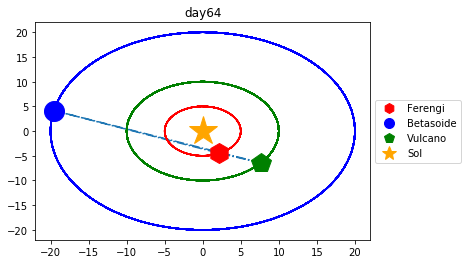

In [60]:
make_plot(64)

In [41]:
angle_between((x2[1], y2[1]), (x2[0], y2[0]))

2.9999995970804969

In [40]:
check_area_day(15), check_area_day2(15)

(-36.60253815748601, 36.602538157486)

In [75]:
check_sun_inside(566)

False

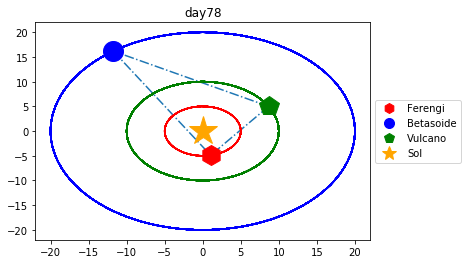

In [84]:
make_plot(78)

In [74]:
def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

day1 = 25
b1 = sign((0, 0), (x1[day1], y1[day1]), (x2[day1], y2[day1]))
b2 = sign((0, 0), (x2[day1], y2[day1]), (x3[day1], y3[day1]))
b3 = sign((0, 0), (x3[day1], y3[day1]), (x1[day1], y1[day1]))
b1, b2, b3

(-76.604449103992, -68.40402585286799, -25.000001062756013)

In [83]:
lluvia_intensa

[2058,
 3138,
 78,
 1158,
 2238,
 258,
 1338,
 2418,
 3498,
 438,
 3318,
 1518,
 2598,
 618,
 1698,
 2778,
 798,
 1878,
 2958,
 978]